<img align="right" src="Logo_Università_Padova.png" alt="Drawing" style="width: 140px"/> 
# Bayesian Blocks: an algorithm for histogram representation 


**************
**Student:** Alice Pagano  

**ID     :** 1236916
**************
July 17, 2020


### Abstract

The Bayesian Blocks algorithm can be used to improve the binning of histograms by finding the optimal segmentation of the data. The visual improvement can be dramatic, but, more importantly, this algorithm produces histograms that accurately represent the underlying distribution while being robust to statistical fluctuations.
In this project, the Bayesian Blocks algorithm is implemented in R and its performances are tested with different sets of data.


### Index <a class="anchor" id="0"></a>

1. [Introduction](#1) <br> 
    1.1. [Representation of data: histograms](#1.1) <br> 
    1.2. [Introduction to Bayesian Blocks method](#1.2) <br> 
2. [Main assumptions of Bayesian Blocks method](#2) <br> 
    2.1. [Piecewise Constant Model](#2.1) <br> 
    2.2. [Fitness of Blocks](#2.2) <br> 
    2.3. [Prior distribution for the number of blocks](#2.3) <br> 
3. [The Algorithm](#3) <br> 
    3.1. [Algorithm Description](#3.1) <br> 
    3.2. [Algorithm Implementation](#3.2) <br> 
    3.3. [Test computational time as a function of N](#3.3) <br> 
4. [Applications: binning histograms](#4) <br> 
    4.1. [Mix of Normal distributed variables](#4.1) <br> 
    4.2. [Uniform Background and Gaussian Signals](#4.2) <br> 
    4.3. [HPGe Am241, Co60 and Cs137 energy spectrum ](#4.3) <br> 
    4.4. [HPGe Eu152 energy spectrum](#4.4) <br> 
5. [Conclusions](#5) <br> 

-----------------------

In [5]:
# USEFUL PACKAGES
library(latex2exp) # library for latex text

----------------------------------
## 1. Introduction <a class="anchor" id="1"></a>

### 1.1. Representation of data: histograms<a class="anchor" id="1.1"></a>

The **data analysis goal** is to identify and characterize statistically significant variations and features in observed data. In particular, histograms are used to represent distributions of data. 
    
Most of the time, a subjectively natural range and bin width is chosen, motivated mainly by obtaining a nice looking plot.
Objective methods have been proposed that determine binning according to some optimization procedure such as   Scott’s Rule optimal for random samples of normally distributed data.

* Some methods takes the **structure of the distribution** into account but uses bins of **fixed width**. 

* Others requires that **each bin have similar numbers of entries**, and thus the bin widths may vary, but the **location of the bin edges** is still chosen **arbitrarily**.


<div class="alert alert-block alert-success"> 
The <b>Bayesian Blocks algorithm</b>, in contrast, allows the bin widths to vary and determines the bin edges based on the structure of the distribution. 
</div>




### 1.2. Introduction to Bayesian Blocks method<a class="anchor" id="1.2"></a>

The Bayesian Block algorithm was originally developed by Jeffrey D. Scargle for applications in astronomy to addresses the problem of detecting and characterizing local variability in time series. Although it was developed for time series data, the algorithm is applicable to other forms of sequential data, or any other other independent variable.
In particular, it can be used to improve the representations of histograms into ones in which the bins are not fixed and are free to be unequal in size as determined by the data.

<div class="alert alert-block alert-info"> 
The Bayesian Blocks algorithm is a <b>non-parametric</b> modeling technique for determining the optimal segmentation of a given set of univariate random variables into blocks, with each block containing consecutive data elements satisfying some well defined criterion. It operate in a <b>bayesian framework</b>.
</div>

The <b>goal</b> is to separate statistically significant features from the ever-present random observational errors and thus to discover local structures in background data exploiting the full information brought by the data themself.


These concepts and methods can be applied in general higher dimensional contexts. Here, however, we concentrate on one-dimensional data.
 

## 2. Main assumptions of Bayesian Blocks method<a class="anchor" id="2"></a>


<b>Main idea</b>: segmentation of the data interval into variable-sized blocks, each containing consecutive data satisfying some well defined criteria. The optimal segmentation is the one that maximizes some quantification of this criterion.


### 2.1. Piecewise Constant Model<a class="anchor" id="2.1"></a>

<div class="alert alert-block alert-info">
For this implementation of Bayesian Blocks algorithm, the range of the independent variable is divided into subintervals (called <b>blocks</b>) generally unequal in size, in which the dependent variable is modeled as <b>constant</b> within errors. 
</div>

The segmentation of the whole observation interval is described by the following parameters:

* $N_{cp}$, the number of change-points.

* $t_k^{cp}$, the change-point starting block $k$.

* $X_k$, the signal amplitude in block $k$.

for $k=1,2,\dots,N_{blocks}$, where the number of blocks is $N_{blocks}=N_{cp}+1$.

The set of blocks is **gapless** and **non-overlapping**, where the first block edge is defined by the first data point, and the last block edge is defined by the last data point. Even though the first data cell always starts the first block, our convention is that it is not considered a change-point.

A block can contain between $1$ and $N$ data points, where the sum of the contents of all the blocks must equal $N$.


Each block is effectively defined by two parameters: the first represents the **signal amplitude**, and is treated as a nuisance parameter to be determined after the change-points have been located, while the second parameter is the **length** of the interval spanned by the block.

This segmented representation is in the spirit of nonparametric approximation and not meant to imply that we believe the signal is actually discontinuous.
The sometimes crude and blocky appearance of this model may be awkward in visualization contexts, but for deriving physically meaningful quantities it is not.

### 2.2. Fitness of Blocks<a class="anchor" id="2.2"></a>

<div class="alert alert-block alert-info"> 
The number of blocks and the edges of the blocks are determined through optimization of a “<b>fitness function</b>”, which is essentially a goodness-of-fit statistic dependent only on the input data and a regularization parameter.
</div>

The algorithm relies on the fitness being **block-additive**, i.e.
$$
F_{total} = \sum_{k=1}^{N_{blocks}} f(B_k)
$$
where $F_{total}$ is the total fitness of the partition for a given dataset, and $f(B_k)$ is the fitness of block $k$. The latter can be any convenient measure of how well a constant signal represents the data within the block.

<div class="alert alert-block alert-info">
    Hence, the <b>key idea</b> is that the <b>blocks can be treated independently</b>, in the sense that a block’s fitness depends on its data only.
</div>

<div class="alert alert-block alert-warning">
The best model is found by maximizing $F_{total}$ over all possible such partitions.
</div>

There is a considerable freedom in choosing the fitness function (rely on sufficient statistics). 

#### 2.2.1. Cash statistics for Event Data

Let us consider **Event Data** (i.e. series of discrete events) for which it is natural to associate one data cell with each event. For example, the fitness function is easily obtained starting with the unbinned likelihood known as the Cash statistics. 

With a model $M(t,\theta)$, the unbinned log-likelihood reads:

$$
\log L(\theta) = \sum_n \log M(t_n,\theta) - \int M(t,\theta) \text{d} t
$$
where the sum is over the events and $\theta$ represents the model parameters.

Our block model is constant with a single parameter, $M(t,\lambda) = \lambda$, so for block $k$: 

$$
\log L^{(k)} (\lambda) = N^{(k)} \log \lambda - \lambda T^{(k)}
$$

where $N^{(k)}$ is the number of events in block $k$ and $T^{(k)}$ is the length of the block. 

Now we maximize with respect to the nuisance parameter $\lambda$ (height of the block):
<div class="alert alert-block alert-danger">
$$
\log L_{max} ^{(k)} + N^{(k)} = N^{(k)} ( \log N^{(k)} - \log T^{(k)} )
$$
</div>
where the term $N^{(k)}$ is taken to the left side because its sum over the blocks is a constant ($N$, the total number of events) that is model independent and therefore irrelevant.
Moreover, note that this fitness function is **scale invariant** ($T \rightarrow \alpha T$). 

The fitness of the entire partition will be then:

$$
\log L = \sum_k \log L_{max}^{(k)}
$$

### 2.3. Prior distribution for the number of blocks<a class="anchor" id="2.3"></a>

<div class="alert alert-block alert-info"> 
The fitness described above must be modified by a penalty term for the number of blocks. 
We influence the number of blocks by defining a prior distribution for the number of blocks. Adjusting a parameter controlling the steepness of this prior establishes relative probabilities of smaller or larger numbers of blocks.
</div>

In the usual fashion for Bayesian model selection in cases with high signal-to-noise $N_{blocks}$ is determined by the structure of the signal; with lower signal-to-noise the prior becomes more and more important. In short, we are regulating not smoothness but complexity.

#### 2.3.1. Flat Prior

Without explicitly adding any additional parameter to the fitness function, there is an implicit assumption of a **uniform prior** on the number of blocks between $0$ and $N$.

#### 2.3.2. Geometric Prior
However, a flat prior on the number of blocks is unreasonable. Indeed, in most settings, it is much more likely a priori that $N_{blocks} \ll N$ than that $N_{blocks} \sim N$.
For this reason, it is desirable to impose a prior that assigns smaller probability to a large number of blocks, and we adopt this **geometric prior**:
<div class="alert alert-block alert-danger"> 
$$
P(N_{blocks}) = P_0 \gamma^{N_{blocks}}
$$
</div>
where $P_0$ is the normalization constant defined as:

$$
P_0 = \frac{1-\gamma}{1-\gamma^{N+1}}
$$

for $0 \le N_{blocks} \le N$, and zero otherwise since $N_{blocks}$ cannot be negative or larger than the number of data cells.
This form for the distribution dictates that, finding $k + 1$ blocks is less likely by the constant factor $\gamma$ than is finding $k$ blocks.

Thus, in almost all applications $\gamma$ will be chosen $<1$ to express that a smaller number of blocks is a priori more likely than a larger number. 

#### 2.3.3. Fixing the Parameter in the Prior Distribution for $\pmb{N_{blocks}}$

Let us consider the geometric prior. An overly conservative value will suppress the detection of true change-points, while a too liberal value will lead to spurious change points (eventually reaching the limit of $N_{blocks} = N$). 
Hence, an optimal choice is a tradeoff between a conservative choice and a liberal choice. 

**General rule**: running the algorithm with a few different values can be enough. In general, the number of change-points is insensitive to a large range of reasonable values of your “steepness” parameter.

<div class="alert alert-block alert-info"> 
    A <b>rigorous approach</b> is calibrating the prior as a function of the number of data points $N$ and the correct detection rate $p_0$ on toy pure-noise experiments. 
</div>

This objective procedure is based on relating this parameter to the **false positive probability**. This is the relative frequency with which the algorithm falsely reports detection of a change-point in data with no signal present. It is convenient to use the complementary quantity:

$$
p_0 \equiv 1 - (\text{false positive probability})
$$

This number is called **correct detection rate** for single change-points, because it is the frequency with which the algorithm correctly rejects the presence of a change-point in pure noise. 




#### 2.3.4. Rigorous Calibrated Prior for Event Data

A prior calibration following the rigorous approach for **Event Data** (i.e. for which one data cell is associated to each event) yields:
<div class="alert alert-block alert-danger">
$$
\log P(N,p_0) = 4 - \log(73.53 p_0 N^{-0.478}) 
$$
</div>

## 3. The Algorithm<a class="anchor" id="3"></a>

### 3.1. Algorithm Description<a class="anchor" id="3.1"></a>

<div class="alert alert-block alert-warning">
For a given dataset of dimension $N$, the number of possible partitions (i.e. the number of ways $N$ cells can be arranged in blocks) is $2^N$. This number is exponentially large, rendering an explicit exhaustive search of partition space utterly impossible for all but very small $N$. 
</div>

A **dynamic programming approach** (following the spirit of mathematical induction) is used to overcome the problem: beginning with the first data cell, at each step one more cell is added. More specifically:

* sort the data and start from the first one, the only possible partition is trivially optimal;

* the optimal partition is updated at each step using the information from the previous ones. For example, during iteration $n$ (where data point $n$ is being evaluated), the potential total fitnesses are calculated as:
$$
F_{total} (n,m) = F_m + f(B_m^n), \quad m=1,2,\dots,n-1
$$
where $F_m$ is the optimal fitness as determined during iteration $m$, and $f(B_m^n)$ is the fitness of the block bound between data points $n$ and $m$;

* this potential total fitness is calculated $n − 1$ times at each iteration, and the maximum of those fitnesses along with the relevant change-points are stored and used during the subsequent iterations.

* the iterations normally continue until the whole interval has been analyzed. After the final iteration, $N$, the change-points associated with the maximum total fitness are returned.

<div class="alert alert-block alert-success">
The beauty of the Bayesian Blocks algorithm is that it finds the optimum among all partitions without an exhaustive explicit search, which is obviously impossible for almost any value of $N$ arising in practice. Indeed, this method guarantees that the global maximum fitness is obtained in $\pmb{O(N^2)}$, which is much more efficient than an exhaustive search of all $2^N$ potential configurations.
</div>


### 3.2. Algorithm Implementation<a class="anchor" id="3.2"></a>

 Below is reported the basic code for Bayesian Blocks histogram written in R.

In [2]:
bayesian_blocks <- function(data,data_type='array',string_f='cash',
                            string_p='p0',gamma=0.01,p0=0.01,bool_time=FALSE){
    
    #----------------------------------------------------------
    #Bayesian Blocks Implementation
    #----------------------------------------------------------
    #
    #Parameters
    #------------------------------
    #data : data to be partitioned by the algorithm 
    #       
    #data_type : string
    #            * 'array': list of data
    #            * 'hist' : histogram of data 
    #                      (for high statistics data)
    #string_f : string
    #            * 'cash' : fitness function for Event Data
    #string_p : string
    #            * 'uniform': uniform prior
    #            * 'gamma'  : gamma prior 
    #            * 'p0'     : calibrated prior
    #gamma : float
    #        parameter characterizing slope of the prior 
    #        for the number of blocks
    #p0 : float
    #     correct detection rate parameter
    #
    #Returns
    #------------------------------
    #bins : vector
    #       containing the (N+1) bin edges
    #----------------------------------------------------------
    
    if(bool_time){
        start_time <- Sys.time()
    }
    
    # if data is an array of float
    if(data_type=='array'){
            # load require library for function count func
            require(plyr)
            # take care of repeated data
            x_sorted <- sort(data)
            x_unique <- unique(x_sorted) 
            x_weight <- count(x_sorted)$freq 
        
            #x_unique <- c(x_sorted[1])
            #x_weight <- c(1)
            #
            #for(i in 2:length(x_sorted)){
            #    if(x_sorted[i] == x_sorted[i-1]){
            #        x_weight[length(x_weight)] <- x_weight[length(x_weight)] + 1
            #    }
            #    else{
            #        x_unique <- c(x_unique, x_sorted[i])
            #        x_weight <- c(x_weight, 1)
            #    }
            #}
    }
    # if data is an hist() returns
    else if(data_type=='hist'){
            br       <- data$breaks
            x_unique <- c(br[1],data$mids,br[length(br)])
            x_weight <- c(1,data$counts,1)
    }
    else{
            stop('Error: unsupported input type.')
    }
    
    # copy vector 
    x <- x_unique
    N <- length(x)

    # create length-(N+1) vector of cell edges
    edges <- c(x[1], 0.5 * (x[2:N] + x[1:(N-1)]), x[N])
    block_length <- x[N] - edges
    
    # create matrix needed for the iteration
    best   <- matrix(0,nrow=1,ncol=N)
    last   <- matrix(0,nrow=1,ncol=N)    
    
    # pre-defined (log)fitness functions
    log_fitness <- function(N_k,T_k,string){
              if(string=='cash'){
                  return( N_k * ( log(N_k) - log(T_k) ) )
              } 
              else{
                  stop("Error: no available fitness function selected.")
              }
    }
 
    # pre-defined (log)prior distributions on the number of changepoints
    log_prior <- function(string){     
              if(string=='uniform'){
                  return( 0 )
              }
              else if(string=='gamma'){
                  return( -log(gamma) )
              }
              else if(string=='p0'){
                  return( 4 - log(73.53 * p0 * N**(-0.478)) )
              }
              else{
                  stop("Error: no available prior selected.")
              }
    }
    
    # evaluate the prior on the number of blocks
    ncp_prior <-  log_prior(string=string_p)
    
    #-----------------------------------------------------------------
    # Start with first data cell; add one cell at each iteration
    #-----------------------------------------------------------------
    for(K in 1:N){
        # Compute the width and count of the final bin for all possible
        # locations of the K^th changepoint
        width <- block_length[1:K] - block_length[K+1]
        count_vec <- rev( cumsum(x_weight[1:K]) )   
        
        # evaluate fitness function for these possibilities
        fit_vec <- log_fitness(N_k=count_vec,T_k=width,string=string_f) 
        fit_vec <- fit_vec - ncp_prior     
        fit_vec[2:K] <- fit_vec[2:K] + best[1:(K-1)]

        # find the max of the fitness: this is the K^th changepoint
        i_max   <- which.max(fit_vec)
        # save best configuration
        last[K] <- i_max
        best[K] <- fit_vec[i_max]      
        }
    
    #-----------------------------------------------------------------
    # Recover changepoints by iteratively peeling off the last block
    #-----------------------------------------------------------------
    change_points <- matrix(0,nrow=1,ncol=N)
    i_cp          <- N + 1
    ind           <- N + 1
    
    while(TRUE){
        i_cp <- i_cp - 1 
        change_points[i_cp] <- ind 
        
        if(ind==1){
            break
            }
        ind <- last[ind-1]        
    }
    
    change_points <- change_points[(i_cp):N]

    if(bool_time){
        end_time <- Sys.time()
        exec_time <- as.numeric(end_time - start_time)
        return(exec_time)
    }
    
    return(edges[change_points])
}

### 3.3. Test computational time as a function of $\pmb{N}$<a class="anchor" id="3.3"></a>

As said, the computational time required by the Bayesian Blocks algorithm scales as $O(N^2)$. 
Now, we check this scaling time law by giving to the algorithm a growing number of data of normal distributed random variables with $\mu$=0 and $\sigma$=1.

In [3]:
# Define function to return computational time
# required by Bayesian Blocks algorithm for a fixed N
comp_time <- function(N){
                set.seed(40)
                norm_data <- rnorm(N,0,1)
                time <- bayesian_blocks(norm_data,bool_time=TRUE)
             }

# compute sequence of N to test
N_seq <- c(1e2,seq(1e3,1e4,by=1e3)) #,1e5)

# calculate computational time for each N
time_list <- c(NULL)
for(i in N_seq){
    time_list <- c(time_list,comp_time(i))
}

Caricamento del pacchetto richiesto: plyr



We make a second order fit of the time data as a function of $N$ to verify the scaling law. 

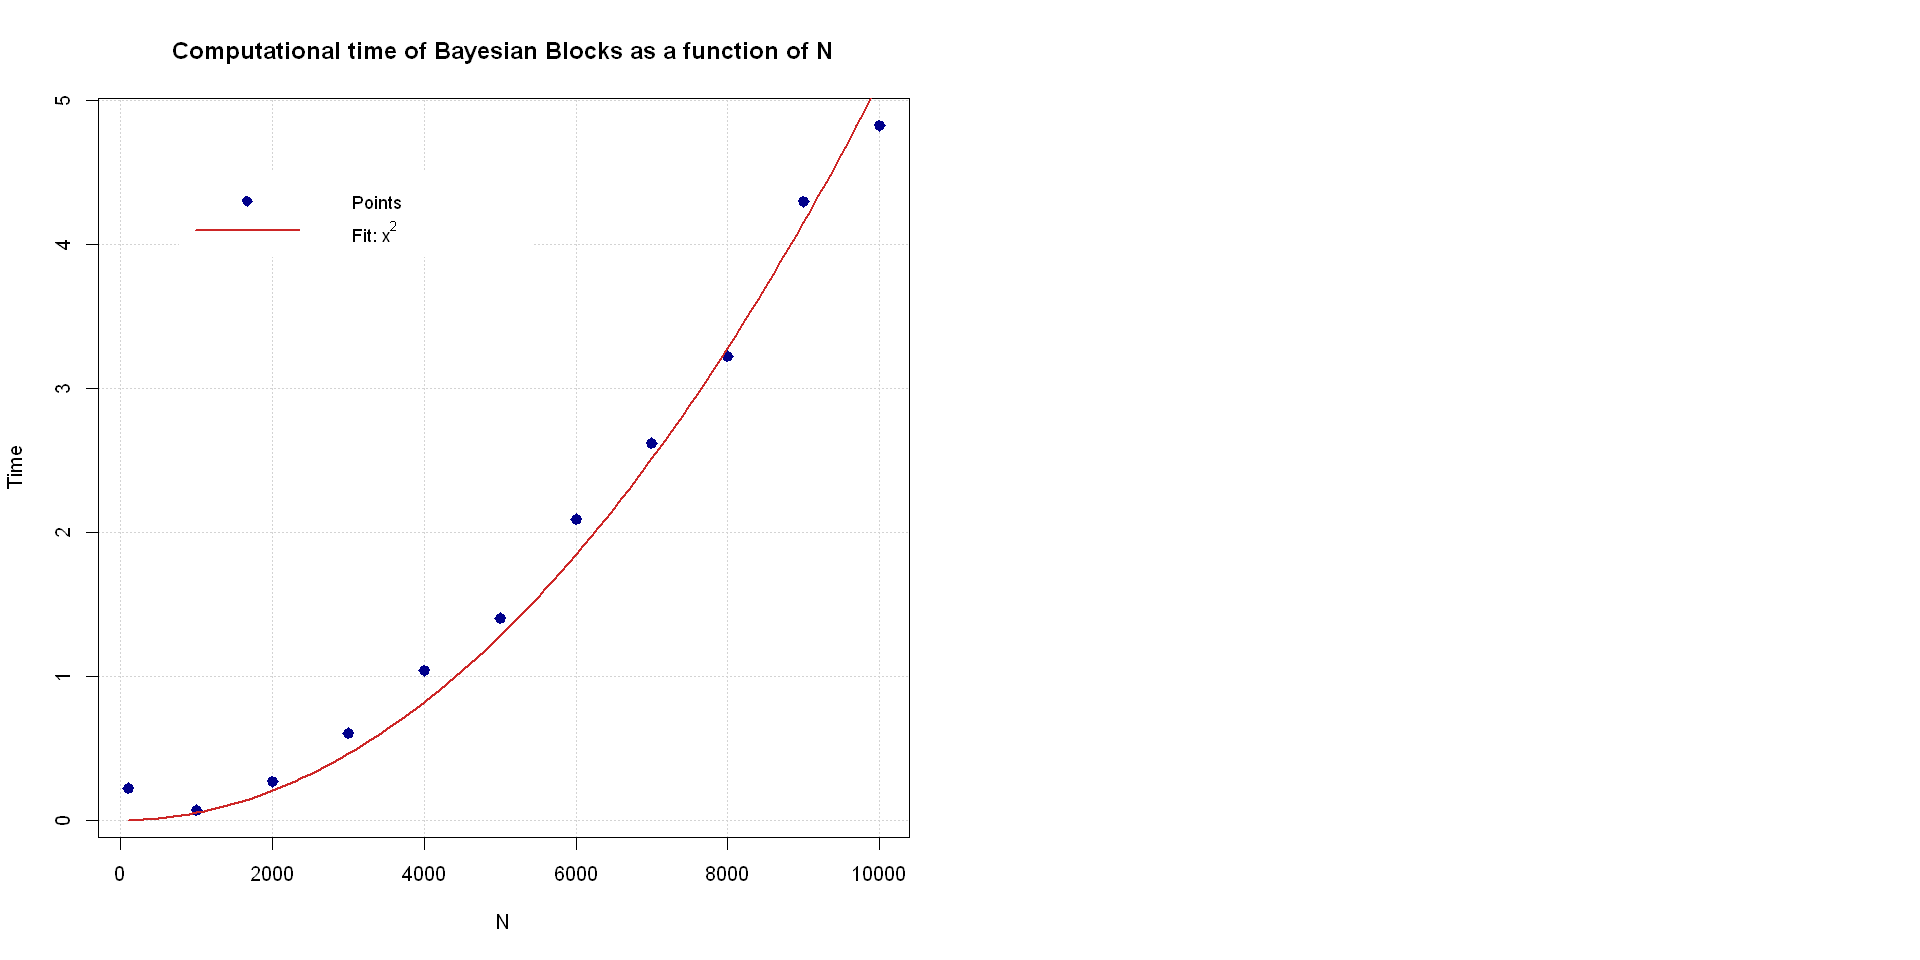

In [6]:
x <- N_seq
y <- time_list

# second order fit
fit2 <- lm(y ~ 0 + I(x^2))
xx <- seq(1e2,1e4,by=1e2)
yy <- predict(fit2,data.frame(x=xx))

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=8)

plot(x,y,xlab='N',ylab='Time',col='darkblue',pch=10,panel.first=grid(),
     lwd=3,main='Computational time of Bayesian Blocks as a function of N')
lines(xx, yy, col = "firebrick3",lwd=2)

legend("topleft", inset=+0.1,legend=c("Points",TeX(sprintf("Fit: $x^2$"))),
       col=c("darkblue","firebrick3"),lty=c(NA,1), pch=c(10,NA),lwd=c(3,2), cex=0.9,box.lty=0, border=F)

The result is consistent with what expected: the computational time required scales approximately as $O(N^2)$.

Moreover, we note that for $N \sim 10^{5}$ the algorithm requires a lot of time. 
To handle the problem, for a large number of $N$, we can use a **trick** adopted for **high statistics**: we bin the data and treat each bin as a data point of multiplicity, which correspond to bincontent in the algorithm.

This solutions is easily obtainable with the implemented function. We just need to make an histogram of the data with a wanted fixed number of edges and pass this object as data of the algorithm function.

## 4. Applications: binning histograms<a class="anchor" id="4"></a>

Now, we test the Bayesian Blocks algorithm with different sets of data in order to evaluate its performance.

### 4.1. Mix of Normal distributed variables<a class="anchor" id="4.1"></a>

Let us sample a set of normal distributed random data which dimension is $N \sim 10000$.

In [7]:
# Define our test distribution: a mix of Normal-distributed variables
set.seed(40)
norm_data <- c(rnorm(2000,0,0.8),rnorm(4000,5,0.7),rnorm(4000,7,0.5))
N <- length(norm_data)

cat('Length dataset:', N)

Length dataset: 10000

First of all, we make an histogram of data with equal bin size and with a number of edges chosen arbitrarly. Then, we use the Bayesian Blocks algorithm with the two different implemented priors ($\gamma$ and $p_0$).

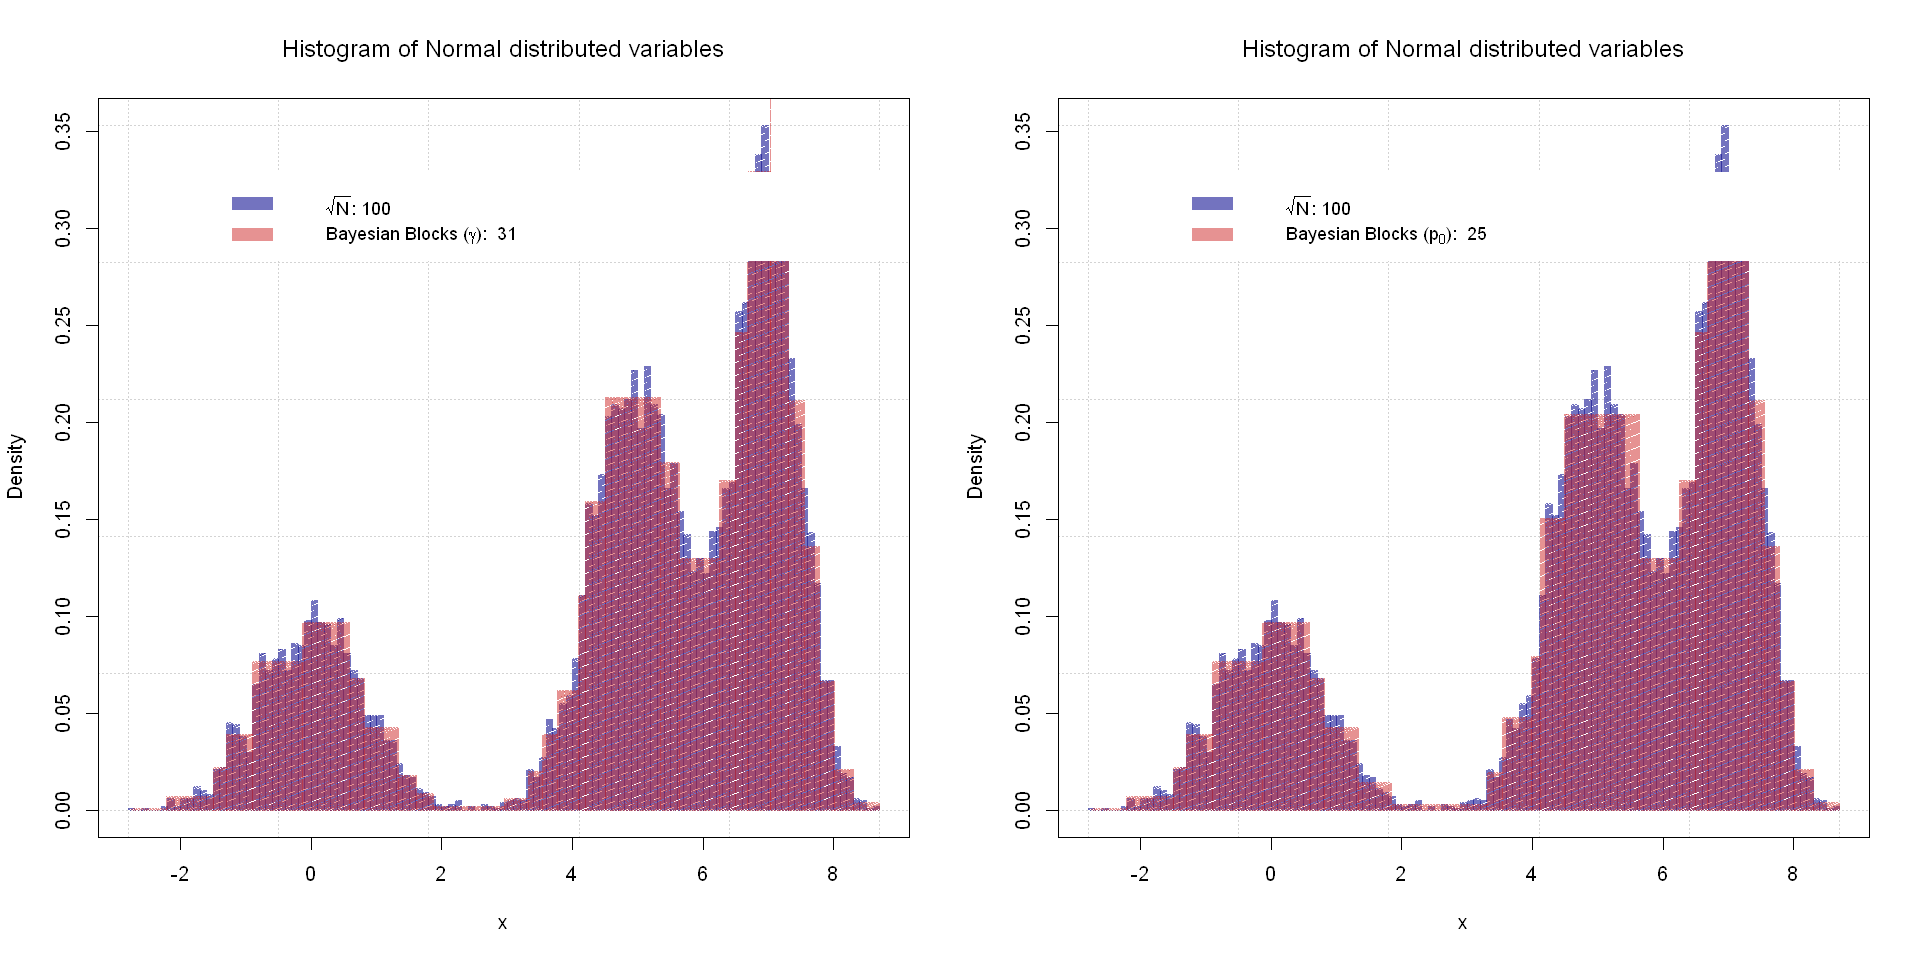

In [8]:
# Plot histogram of generated random numbers 
par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=8)

# Histogram with gamma prior
#
# sqrt(N)
hist(norm_data,breaks=sqrt(N),freq=FALSE,col=scales::alpha('darkblue',.55),border=F, panel.first=grid(),density=200,
     xlab='x',ylab='Density',main=TeX(sprintf('Histogram of Normal distributed variables')))
# Bayesian Blocks
breaks = bayesian_blocks(norm_data,string_p='gamma',gamma=0.02)
hist(norm_data,breaks=breaks,density=200,
     freq=FALSE,col=scales::alpha('firebrick3',.5),border=F,add=T)

legend("topleft", inset=+0.1,legend=c(TeX(sprintf("$\\sqrt{ N }$: %3i",floor(sqrt(N)))),TeX(sprintf("Bayesian Blocks ($\\gamma$): %3i",length(breaks)))),
       fill=c(scales::alpha('darkblue',.55),scales::alpha('firebrick3',.5)),cex=0.9,box.lty=0, border=F)
box()

# Histogram with p0 prior
#
# sqrt(N)
hist(norm_data,breaks=sqrt(N),freq=FALSE,col=scales::alpha('darkblue',.55),border=F, panel.first=grid(),density=200,
     xlab='x',ylab='Density',main=TeX(sprintf('Histogram of Normal distributed variables')))
# Bayesian Blocks
breaks = bayesian_blocks(norm_data,string_p='p0',p0=0.1)
hist(norm_data,breaks=breaks,density=200,
     freq=FALSE,col=scales::alpha('firebrick3',.5),border=F,add=T)

legend("topleft", inset=+0.1,legend=c(TeX(sprintf("$\\sqrt{ N }$: %3i",floor(sqrt(N)))),TeX(sprintf("Bayesian Blocks ($p_0$): %3i",length(breaks)))),
       fill=c(scales::alpha('darkblue',.55),scales::alpha('firebrick3',.5)),cex=0.9,box.lty=0, border=F)
box()

We can see that the adaptive-width bins lead to a very clean representation of the important features in the data. Moreover, if we tune appropriately the parameter's prior, we cannot note any difference between them. In practice, as the length of the data becomes higher, the used prior influence less the representation of the data. 

### 4.2. Uniform Background and Gaussian Signals<a class="anchor" id="4.2"></a>

Now, we test the algorithm on a dataset made by a uniform noise background and three gaussian signals. In particular, we want to see if the algorithm is capable to recognize both tight and wide peaks.

In [7]:
set.seed(30)
noise <- runif(1e4,0,8)
sig1 <- rnorm(1e3,4,0.7)
sig2 <- rnorm(1e3,7,0.6)
sig3 <- rnorm(1e3,2,0.01)

tot_sig <- c(noise,sig1,sig2,sig3)

data <- tot_sig
N    <- length(data)

cat('Length dataset:', N)

Length dataset: 13000

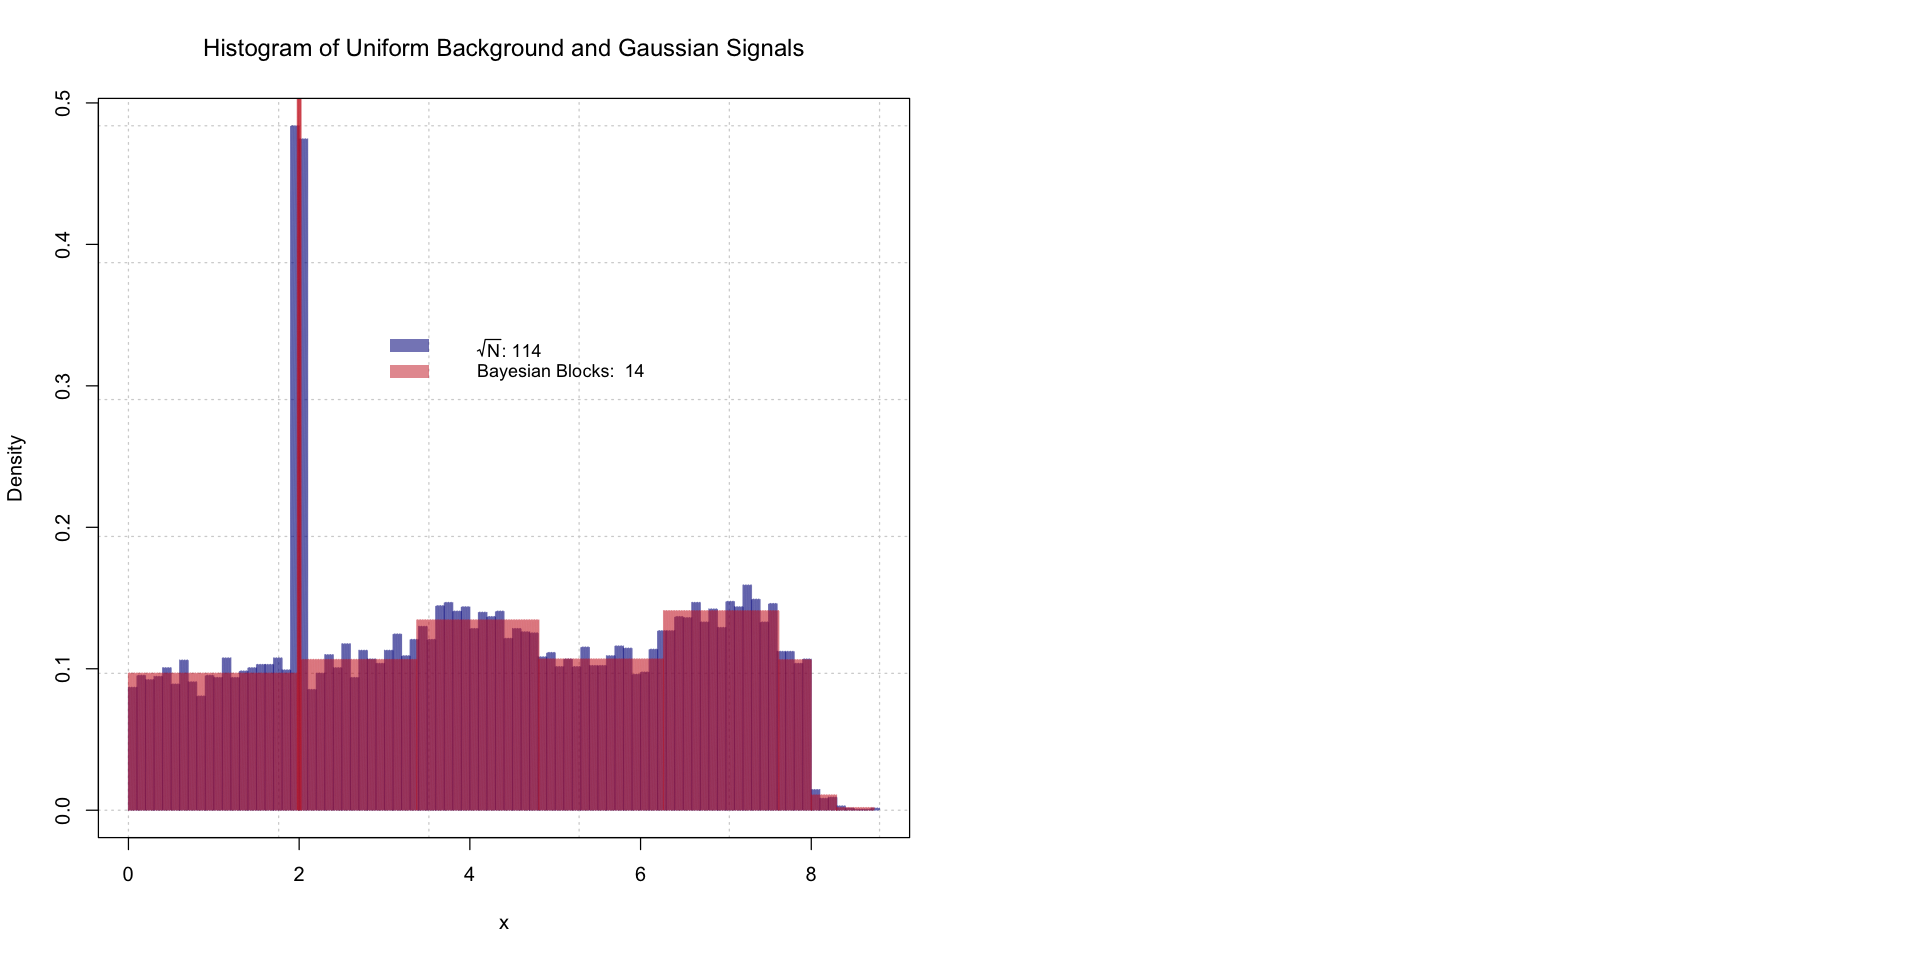

In [8]:
# Plot histogram of generated random numbers 
par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=8)

# Histogram with gamma prior
#
# sqrt(N)
hist(data,breaks=sqrt(N),freq=FALSE,col=scales::alpha('darkblue',.55),border=F, panel.first=grid(),density=200,
     xlab='x',ylab='Density',main=TeX(sprintf('Histogram of Uniform Background and Gaussian Signals')))
# Bayesian Blocks
breaks = bayesian_blocks(data,string_p='gamma',gamma=0.001)
hist(data,breaks=breaks,density=200,
     freq=FALSE,col=scales::alpha('firebrick3',.5),border=F,add=T)

legend("topleft", inset=0.3,legend=c(TeX(sprintf("$\\sqrt{ N }$: %3i",floor(sqrt(N)))),sprintf("Bayesian Blocks: %3i",length(breaks))),
       fill=c(scales::alpha('darkblue',.55),scales::alpha('firebrick3',.5)),cex=0.9,box.lty=0, border=F)
box()

The algorithm is able to recognize all the important information of the dataset. It recognize very well the tight peak. It also recognize both the two gaussian wider peaks by distinguishing well the uniform background.
In this plot we can exploit the simplicity of this algorithm: it returns with few number of edges the most important features of the dataset.

### 4.3. HPGe Am241, Co60 and Cs137 energy spectrum <a class="anchor" id="4.3"></a>

Let us test the Bayesian Blocks algorithm with an energy spectrum dataset collected with an HPGe detector. The source is a combination of Am241, Co60 and Cs137. It was sealed up and only photons could escape from the source to be detected. Indeed, the alpha particles were absorbed by the sealing. 

Length dataset: 8192

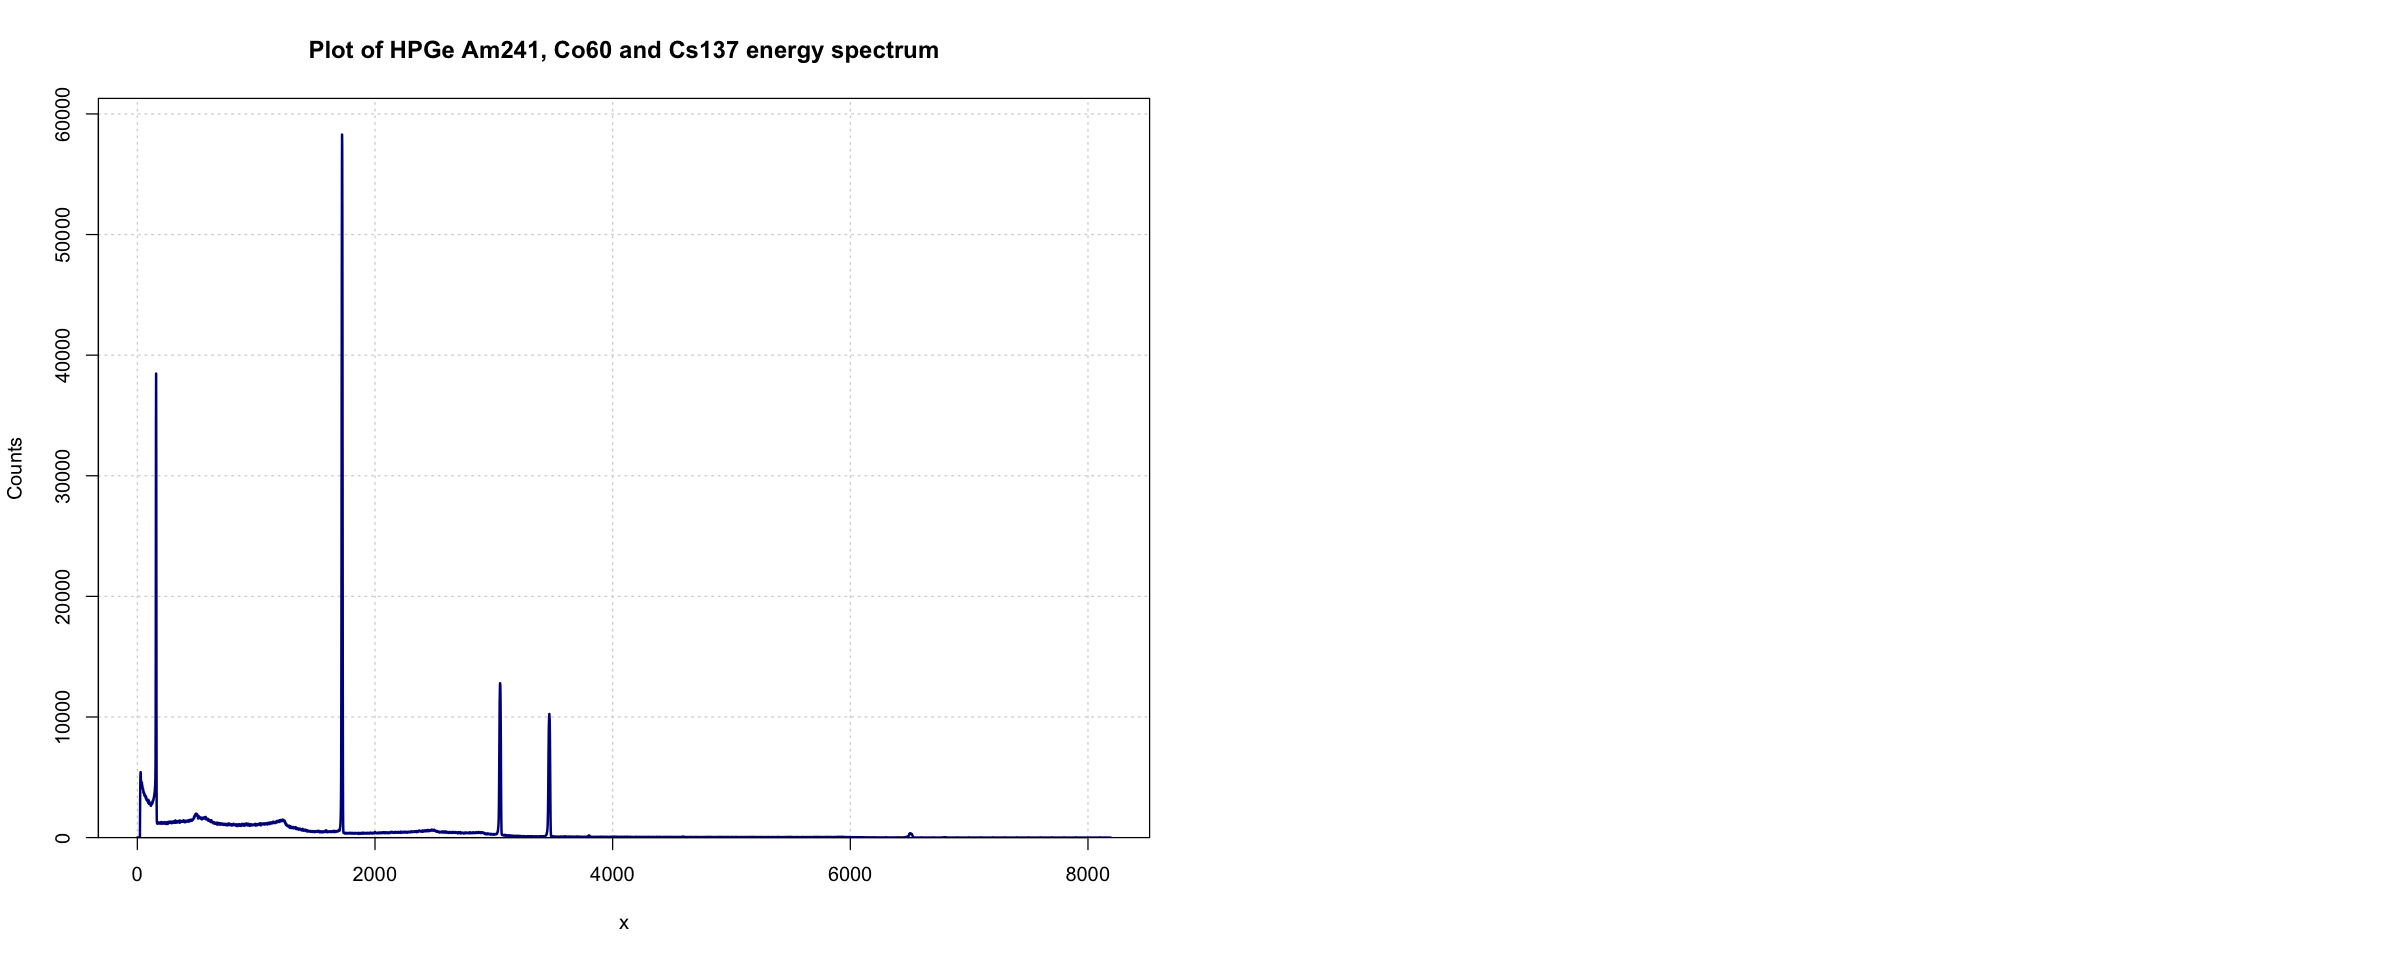

In [9]:
# Load data file and create a dataframe 
filename <- "data/B19036_AmCsCo_20180316.dat"
data  <- read.table(filename, header=FALSE, sep='\n',skip=2, col.names='y') 
dim <- dim(data)[1]
# Add x column
data['x'] <- c(0:(dim-1))
data['y'] <- data$y

cat('Length dataset:', dim)

# set the size and position of the plots
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=8)

plot(data$x, data$y, xaxs='r', yaxs='i', col='darkblue', type='l', panel.first=grid(),
     ylim=c(0,max(data$y)+3000), main = "Plot of HPGe Am241, Co60 and Cs137 energy spectrum", 
     lty=1, lwd=2, xlab='x', ylab='Counts')

We rearrange the dataset in order to make an histogram of given data. In particular, we create a matrix in which we repeat the value $x$ as many times as the number of counts associated.

In [10]:
# Rearrange dataset
new_data <- matrix(0,nrow=sum(data$y),ncol=1)

k <- 1
for(i in 1:dim(data)[1]){
    l <- data$y[i]
    if(l!=0){
        new_data[k:(k+l-1)] <- rep(data$x[i],l)
        k <- k + l 
    }
}

cat('Length new dataset:', dim(new_data)[1])

Length new dataset: 3909541

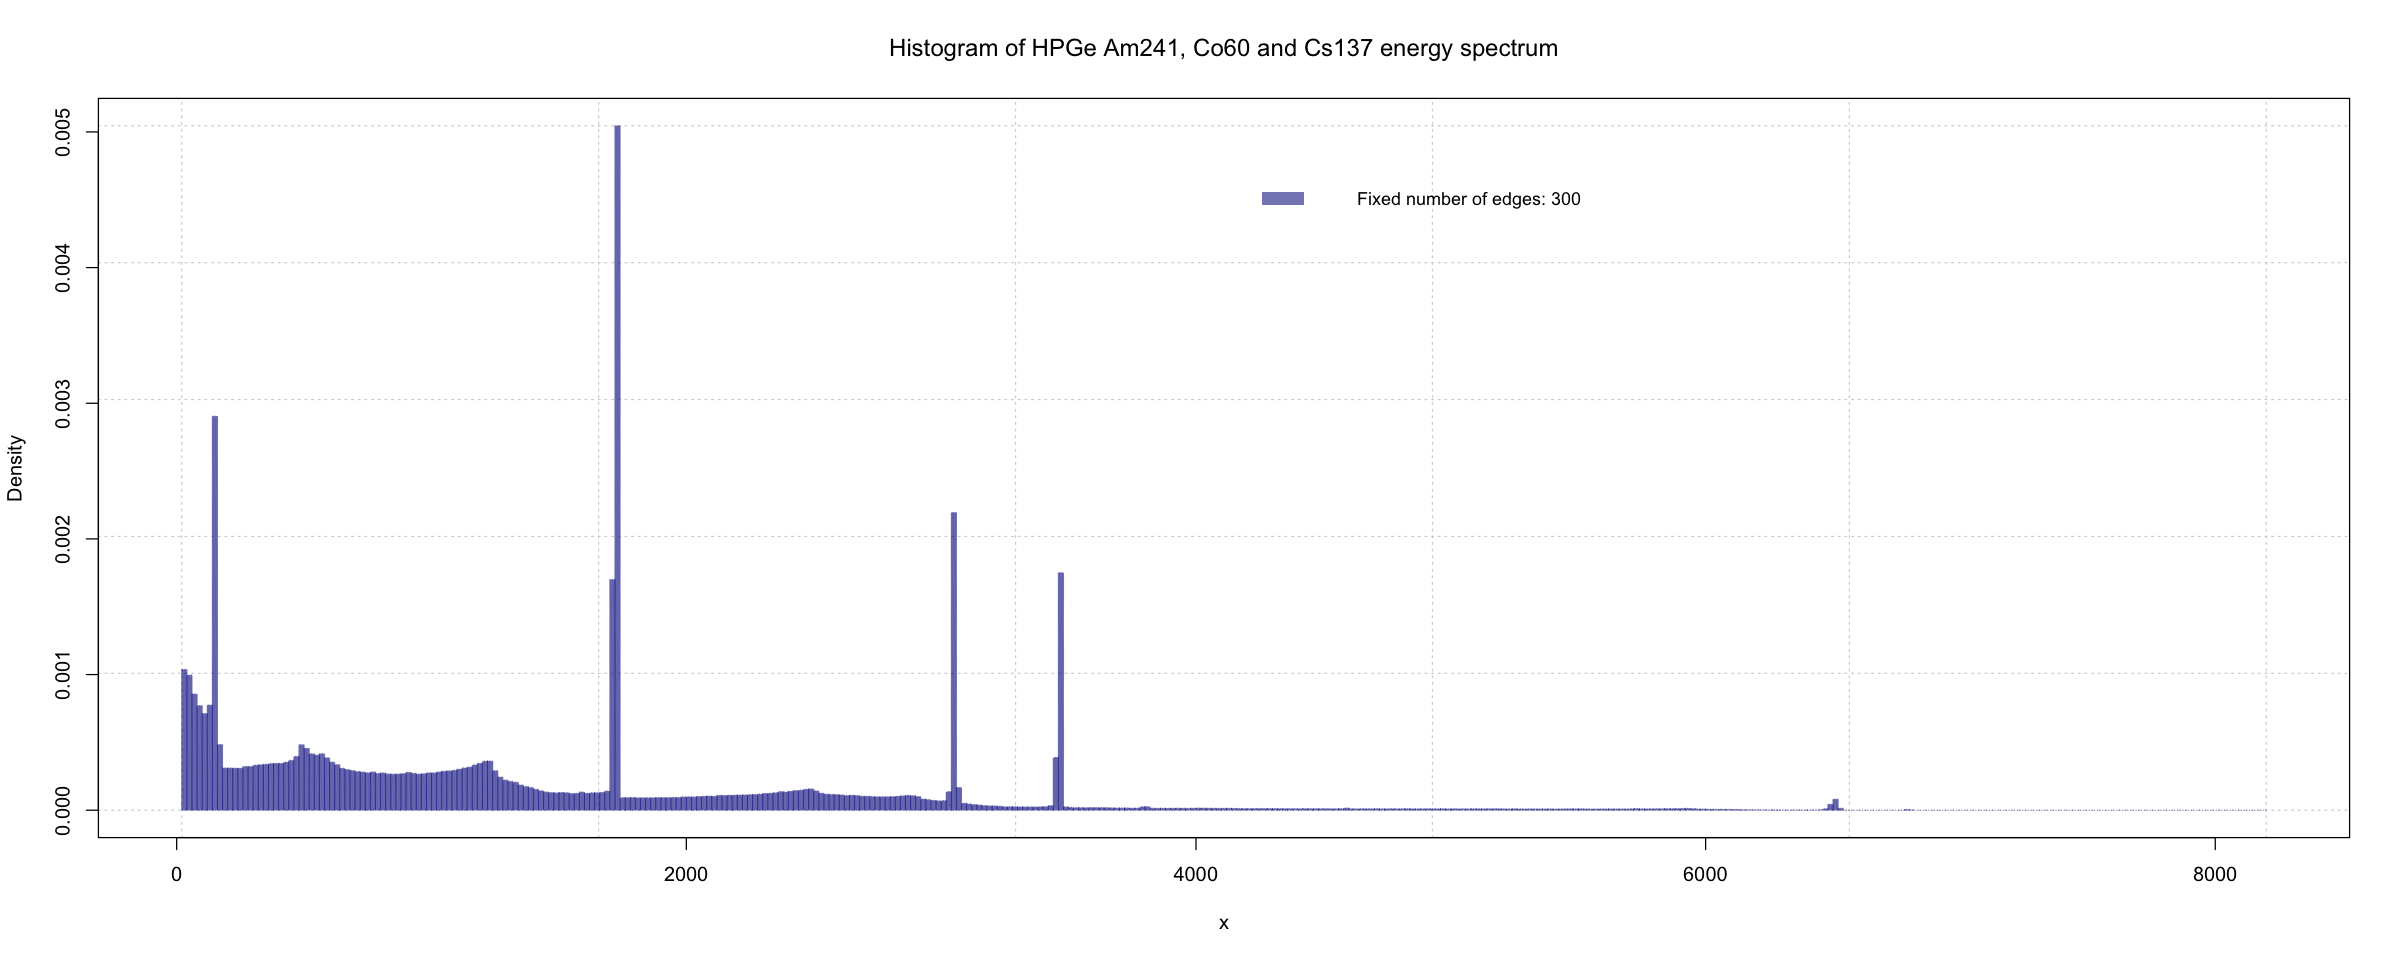

In [11]:
# set the size and position of the plots
par(mfrow=c(1,1))
options(repr.plot.width=20, repr.plot.height=8)

breaks = 300
hist(new_data,breaks=breaks,freq=FALSE,col=scales::alpha('darkblue',.55),border=F, panel.first=grid(),density=200,
     xlab='x',ylab='Density',main=TeX(sprintf("Histogram of HPGe Am241, Co60 and Cs137 energy spectrum")))
legend("topright", inset=+0.1,legend=c(sprintf("Fixed number of edges: %3i",breaks)),
       fill=c(scales::alpha('darkblue',.55)),cex=0.9,box.lty=0, border=F)
box()

Now, me make the histogram of the data either by using a fixed number of edges and by using Bayesian Blocks algorithm with $\gamma$ prior. We represent it in logaritmic scale on $y$ for a better visualization.

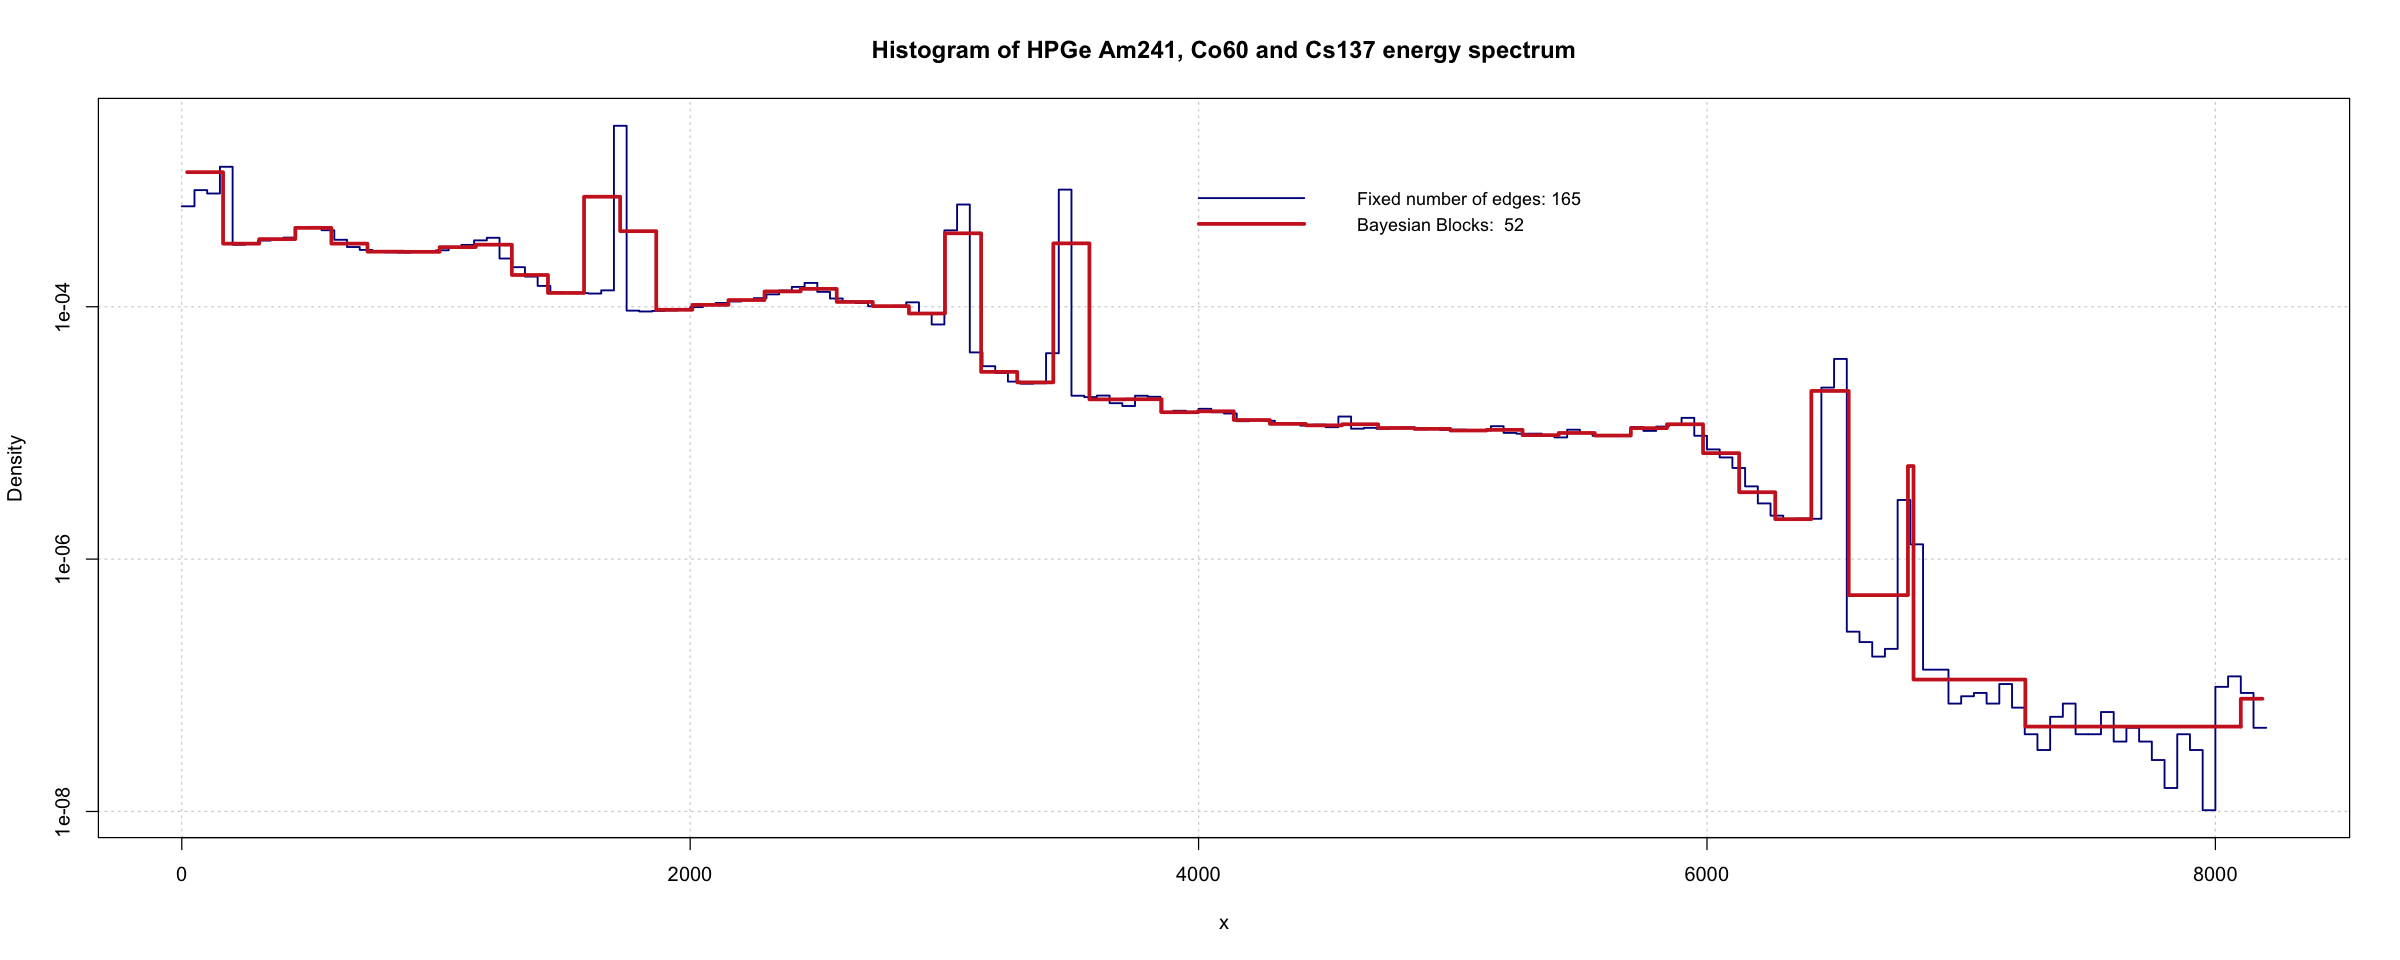

In [12]:
h1 <- hist(new_data,breaks=290,plot=F)
h2 <- hist(new_data,breaks=bayesian_blocks(new_data,data_type='array',string_p='gamma',gamma=0.2),plot=F)

# Plot histogram of generated random numbers 
par(mfrow=c(1,1))
options(repr.plot.width=20, repr.plot.height=8)


# Plot with fixed breaks
plot(x=h1$breaks[1:length(h1$breaks)], y=c(h1$density,tail(h1$density,n=1)), log="y", panel.first=grid(),
     col='darkblue',lwd=1.5, type='s', xlab='x',ylab='Density',
     main="Histogram of HPGe Am241, Co60 and Cs137 energy spectrum")
# Bayesian Blocks
lines(x=h2$breaks[1:length(h2$breaks)], y=c(h2$density,tail(h2$density,n=1)), type='s', lwd=3,col='firebrick3')

legend("topright", inset=+0.1,legend=c(sprintf("Fixed number of edges: %3i",length(h1$breaks)),sprintf("Bayesian Blocks: %3i",length(h2$breaks))),
       col=c("darkblue","firebrick3"),lty=c(1,1), lwd=c(1.5,3), cex=0.9,box.lty=0, border=F)

The Bayesian Blocks algorithm highlitghts the main features of the energy spectrum by recognizing the main spikes of the spectrum.
We note also that varying the parameter of the prior, or changing the function prior itself, does not change the result of the algorithm. It is due to the high number of data in the histogram. As said, for high statistics the prior becomes less important in the spirit of Bayesian analysis.

Altought the large number of events, the algorithm is very fast because it execute the loop only for unique values of $x$. Hence, in this case we are considering only 8192 integer values with their relative weights.

However, if we analyze a float dataset, the number of unique values of $x$ could be very large. 
In this case, we should use the trick previously discussed for high statistics.

### 4.4. HPGe Eu152 energy spectrum<a class="anchor" id="4.4"></a>

Now, let us test the Bayesian Blocks algorithm with an energy spectrum dataset collected with a HPGe detector with a Eu152 source.

Length dataset: 702247

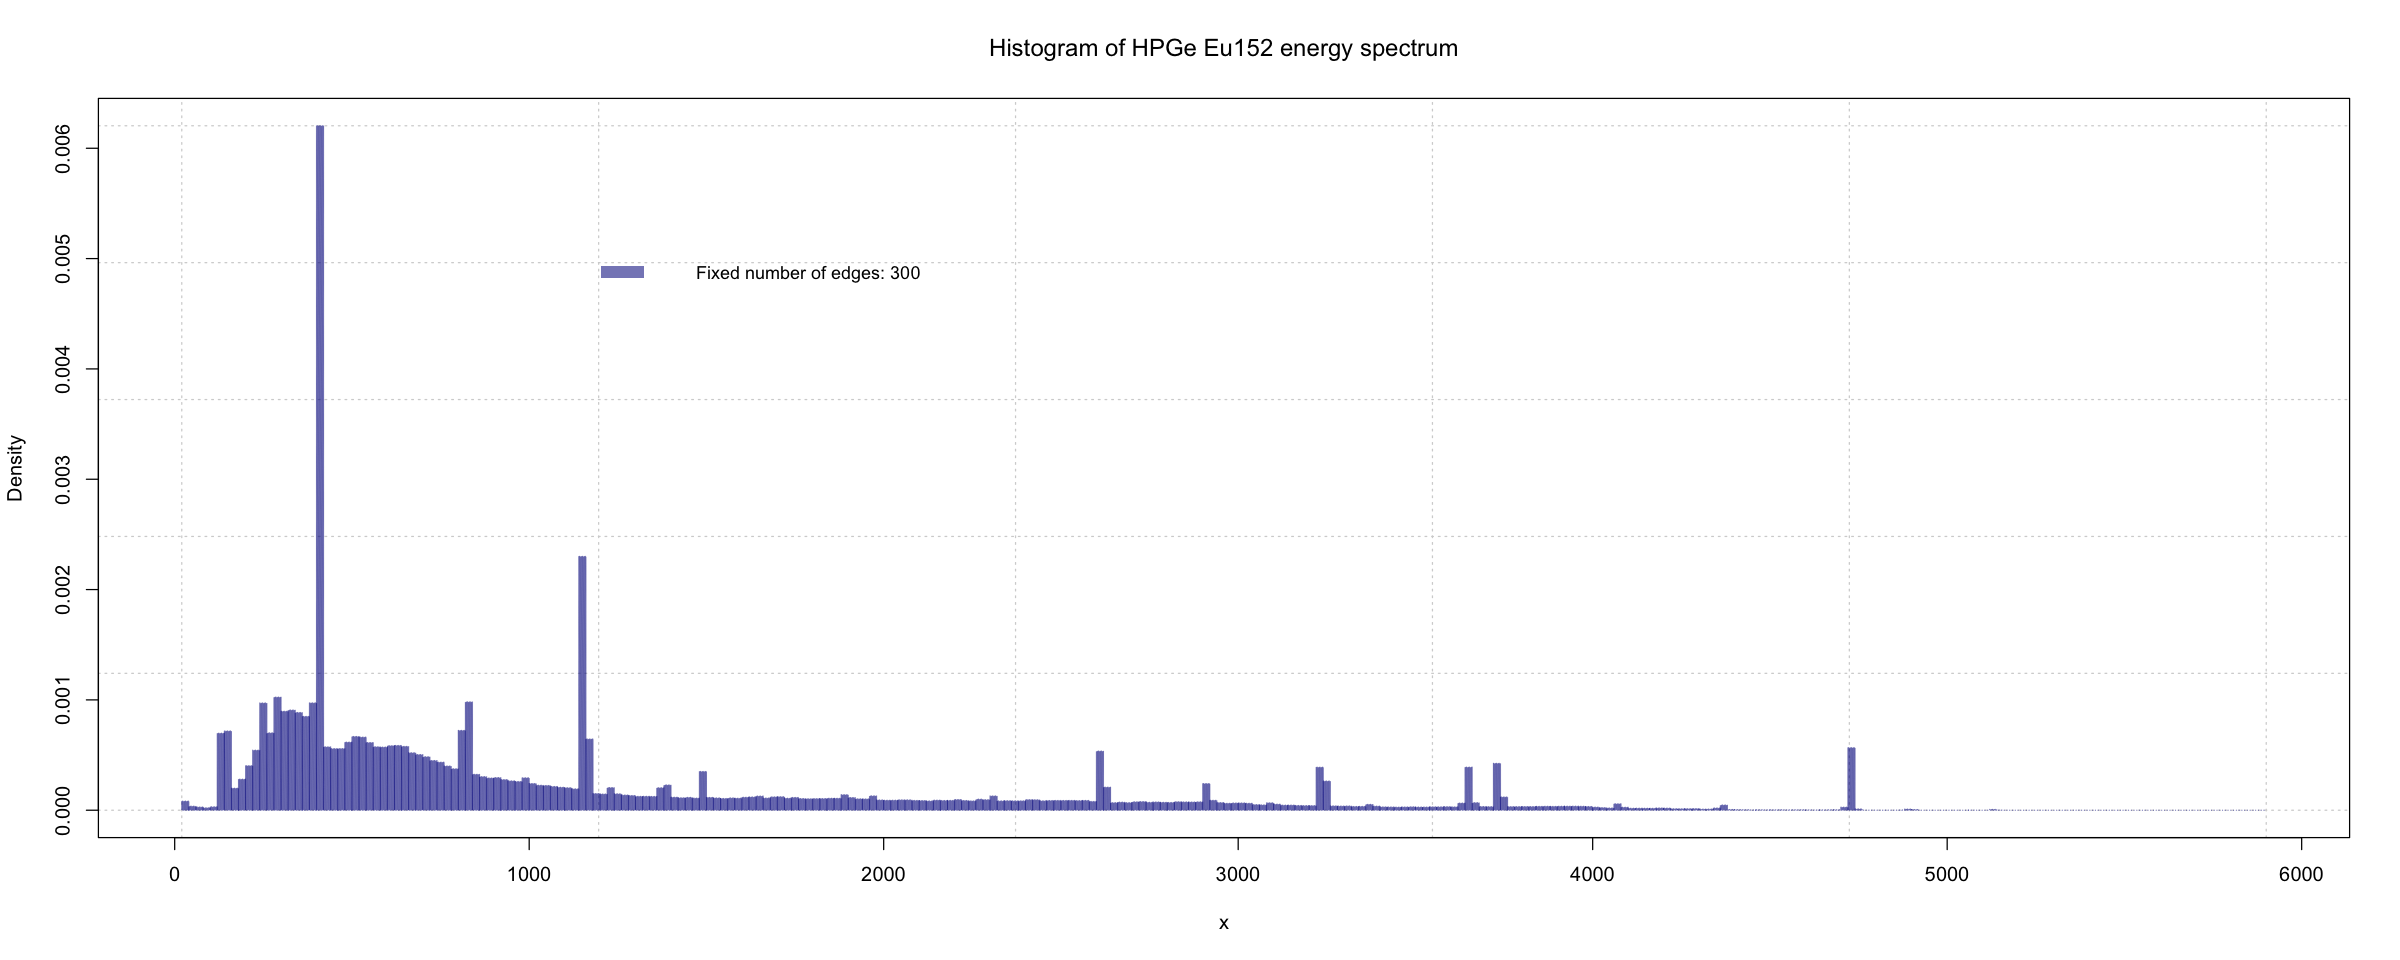

In [13]:
# Load data file and create a dataframe 
filename <- "data/data_Eu152_HPGe.txt"
data  <- read.table(filename, header=FALSE, sep='\n',skip=2, col.names='y') 
dim <- dim(data)[1]

#data <- subset(data,y<1000)
#data <- subset(data,y>20)
#dim <- dim(data)[1]

cat('Length dataset:', dim)

# set the size and position of the plots
par(mfrow=c(1,1))
options(repr.plot.width=20, repr.plot.height=8)

breaks = 300
hist(data$y,breaks=breaks,freq=FALSE,col=scales::alpha('darkblue',.55),border=F, panel.first=grid(),density=200,
     xlab='x',ylab='Density',main=TeX(sprintf("Histogram of HPGe Eu152 energy spectrum")))
legend("topleft", inset=+0.2,legend=c(sprintf("Fixed number of edges: %3i",breaks)),
       fill=c(scales::alpha('darkblue',.55)),cex=0.9,box.lty=0, border=F)
box()

We note that we have less statistics with respect to the previously HPGe energy spectrum dataset. However, let us test the Bayesian Blocks algorithm.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”

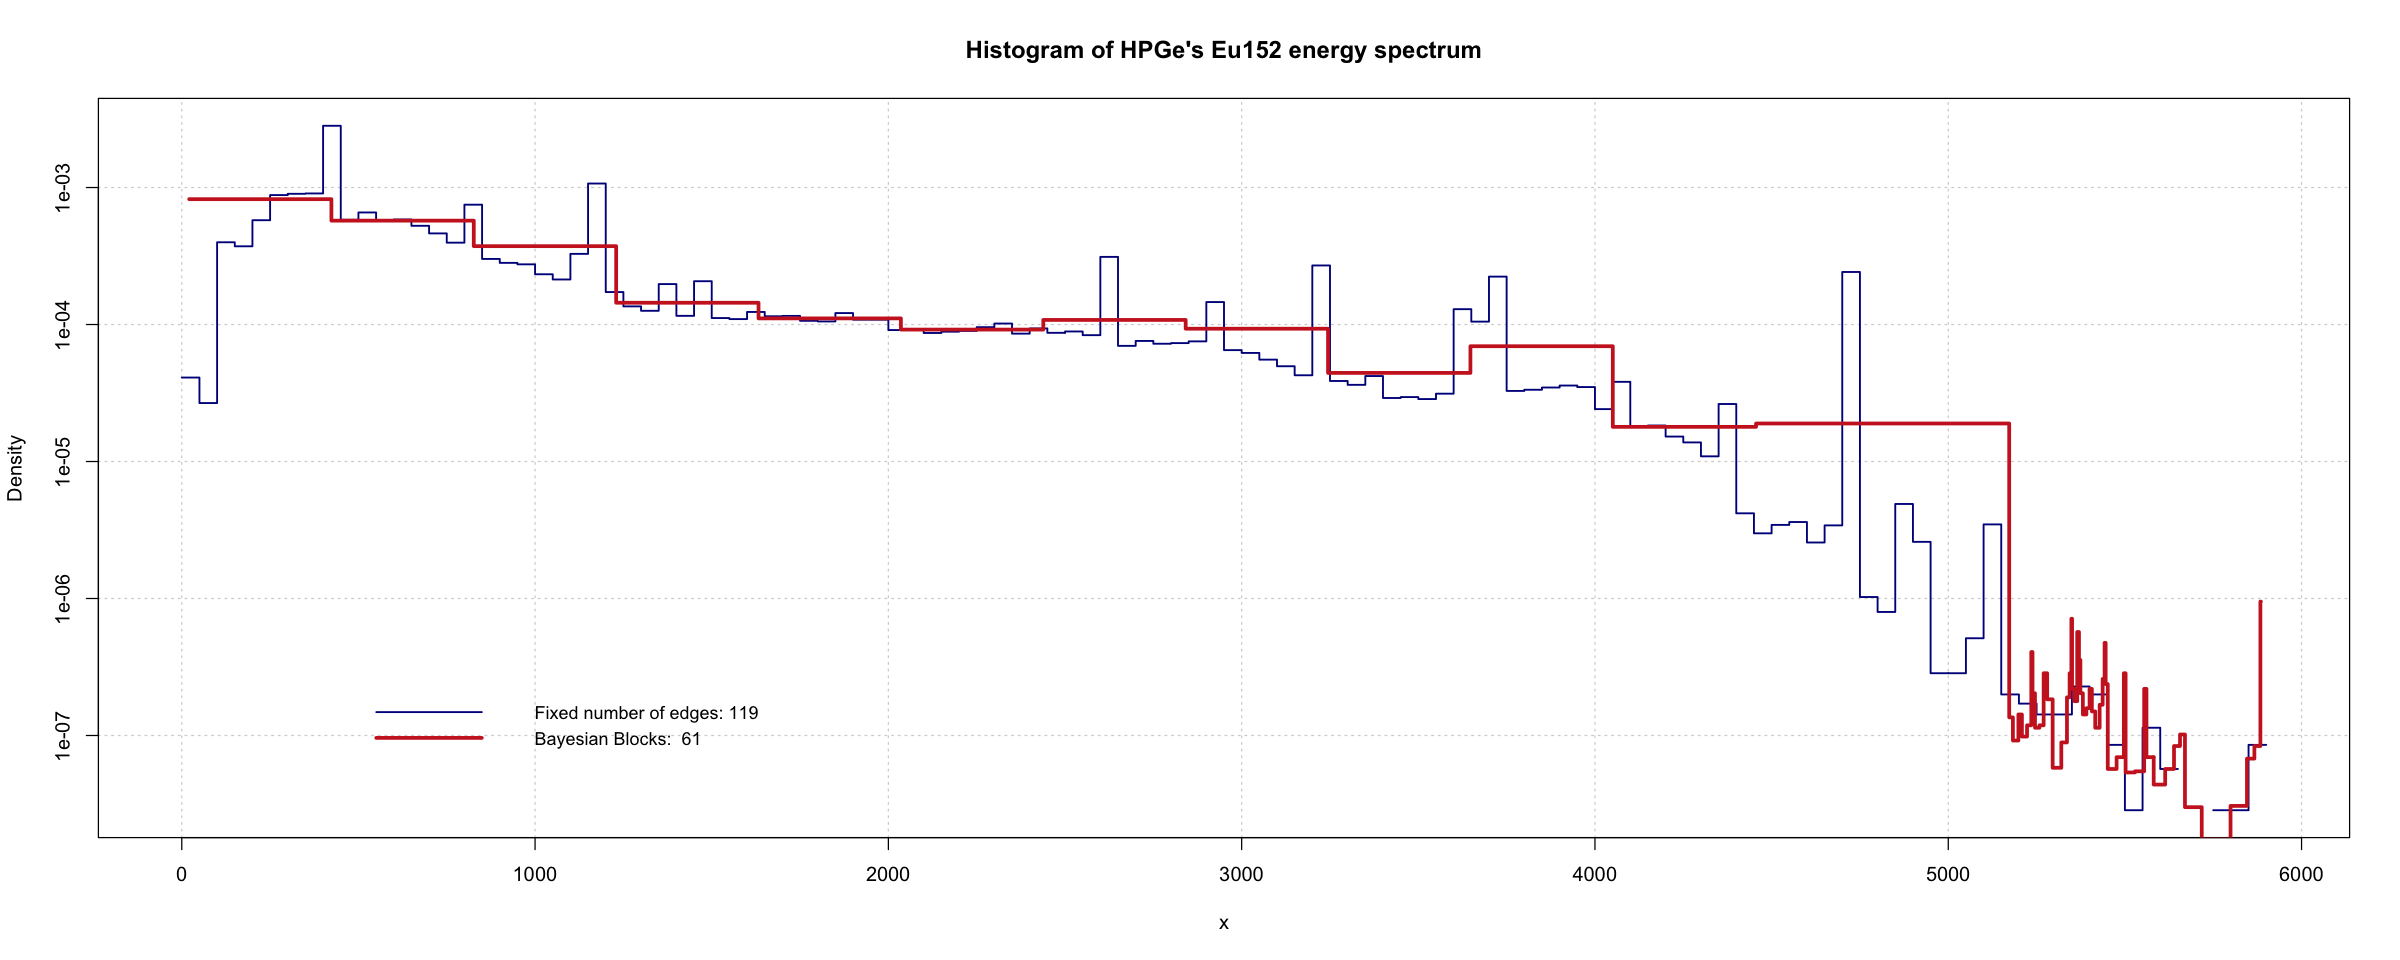

In [14]:
h1 <- hist(data$y,breaks=200,plot=F)
h2 <- hist(data$y,breaks=bayesian_blocks(data$y,data_type='array',string_p='gamma',gamma=0.01),plot=F)

# Plot histogram of generated random numbers 
par(mfrow=c(1,1))
options(repr.plot.width=20, repr.plot.height=8)

# Plot with fixed breaks
plot(x=h1$breaks[1:length(h1$breaks)], y=c(h1$density,tail(h1$density,n=1)), log='y',panel.first=grid(),
     col='darkblue',lwd=1.5, type='s', xlab='x',ylab='Density',
     main="Histogram of HPGe's Eu152 energy spectrum")
# Bayesian Blocks
lines(x=h2$breaks[1:length(h2$breaks)], y=c(h2$density,tail(h2$density,n=1)), type='s', lwd=3,col='firebrick3')

legend("bottomleft", inset=+0.1,legend=c(sprintf("Fixed number of edges: %3i",length(h1$breaks)),sprintf("Bayesian Blocks: %3i",length(h2$breaks))),
       col=c("darkblue","firebrick3"),lty=c(1,1), lwd=c(1.5,3), cex=0.9,box.lty=0, border=F)

We note that the algorithm does not recognize any spike for any implemented prior (we observe that the prior does not influence the number of change points or their position). This result is a bad representation of the Eu152 spectrum. It could be due to the large number of spikes present in this plot. Indeed, they are a lot and they are also not well distinguishable from the background. We recall that a lower signal-to-noise ratio can influence a lot the performance of the Bayesian Blocks algorithm.
Moreover, the peaks are very tight, but this should not be a problem because as we have seen in the previous examples the algorithm is able to recognize tight spikes.

## 5. Conclusions<a class="anchor" id="5"></a>

<div class="alert alert-block alert-success">
In conclusion, the Bayesian Blocks representation provides an objective way to enlighten the key features of a data set by imposing few preconditions as possible.
</div>

An advantage of Bayesian Blocks is that, most of the times, the adaptive-width bins lead to a very clean representation of the important features in the data. Moreover, the algorithm can center the peak of a signal in a bin, so that it will be as clear as possible compared to the background. 

However, Bayesian blocks are better if you are interested in peaks than tails, as tails have few entries and therefore do not change much and have few change points.
For the same reason, Bayesian blocks work better the more data you have, as the changes can be too small to make change points in small data sets. Thus, we need large statistics to correct recognize the important features of a histogram. 


## References

* [1] J. D. Scargle et al., Astrophys. J. 764 (2013) 167
* [2] B. Pollack et al., arXiv:1708.00810
* [3] J. D. Scargle et al., Astrophys. J. 504 (1998) 405
* [4] L. Pertoldi, The Bayesian Blocks algorithm from time series analysis to histogram representation, GERDA meeting presentation, 2018. 